<a href="https://colab.research.google.com/github/chaeeun-P/SQL_TIL/blob/main/toyproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


In [3]:
# 코렙 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,178 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126209 files and dire

In [4]:
import easydict
args = easydict.EasyDict()

# path 정보
args.default_path = '/content/data/MyDrive/DArt-B/토이프로젝트/'
args.train_csv = args.default_path+'train.csv' #위의 파일 경로에다가 추가 경로만 덧붙이는 거. 이런 것이 가능하다라는 것을 알기
args.test_csv = args.default_path+'test.csv'
args.default_submission_csv = args.default_path+'submission.csv'

args.submission_csv = args.default_path+'result/submission.csv'
args.save_results = args.default_path+"result/model_results.json"

# 데이터 분석을 위한 변수들
args.random_state = 42
args.results = []

#easydict 라이브러리를 사용하여 간단한 설정 및 변수들을 정의하고 초기화하는 작업을 수행

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')

#데이터 확인

In [28]:
df1 = pd.read_csv(args.train_csv)
df2 = pd.read_csv(args.test_csv)

In [6]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [9]:
for i in df1.columns:
  print(i, ':', df1[i].nunique())

Loan_ID : 614
Gender : 2
Married : 2
Dependents : 4
Education : 2
Self_Employed : 2
ApplicantIncome : 505
CoapplicantIncome : 287
LoanAmount : 203
Loan_Amount_Term : 10
Credit_History : 2
Property_Area : 3
Loan_Status : 2


In [11]:
df1['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [13]:
df1['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
84.0,4
240.0,4
120.0,3
60.0,2
36.0,2


In [15]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#데이터 전처리 (결측값, 이상치 처리)
- but 이상치를 이상치라고 볼 수 없음 (소득이므로) -> 처리X
- 결측치 있는 값 : id, income 2개, 교육, property, status 제외 모두 -> 이것 맞아요?

In [17]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [29]:
df3 = df1.copy()

In [30]:
df1 = df1.dropna(subset=['LoanAmount','Loan_Amount_Term'])

print(df1)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0           

In [31]:
df1.Credit_History.value_counts()

,count
Credit_History,
1.0,450
0.0,79


In [32]:
result = df1.groupby('Loan_Status')['Credit_History'].value_counts()
print(result)

Loan_Status  Credit_History
N            1.0                91
             0.0                72
Y            1.0               359
             0.0                 7
Name: count, dtype: int64


In [35]:
df1.loc[(df1['Loan_Status'] == 'N') & (df1['Credit_History'].isna()), 'Credit_History'] = 1.0
df1.loc[(df1['Loan_Status'] == 'Y') & (df1['Credit_History'].isna()), 'Credit_History'] = 1.0

In [36]:
df1.Credit_History.value_counts()

,count
Credit_History,
1.0,499
0.0,79


In [37]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [38]:
result = df1.groupby('Gender')['LoanAmount'].mean()
print(result)

Gender
Female    127.566038
Male      149.925926
Name: LoanAmount, dtype: float64


In [49]:
gender_loan_avg = df1.groupby('Married')['LoanAmount'].mean()
female_avg = gender_loan_avg['Yes']
male_avg = gender_loan_avg['No']

# 2. 결측치가 있는 행을 채우기 위한 함수 정의
def fill_gender_based_on_loan_amount(row):
    if pd.isna(row['Married']):  # gender가 결측치인 경우
        loan_amount = row['LoanAmount']
        # female 평균과 male 평균과의 차이를 비교하여 더 가까운 값으로 gender 채우기
        if abs(loan_amount - female_avg) < abs(loan_amount - male_avg):
            return 'Yes'
        else:
            return 'No'
    return row['Married']  # 결측치가 아니면 기존 gender 값 유지

# 3. 결측치가 있는 'gender' 칼럼을 채우기
df1['Married'] = df1.apply(fill_gender_based_on_loan_amount, axis=1)

In [50]:
loan_avg_by_dependents = df1.groupby('Dependents')['LoanAmount'].mean()

# 각 그룹별 평균을 추출
avg_0 = loan_avg_by_dependents['0']
avg_1 = loan_avg_by_dependents['1']
avg_2 = loan_avg_by_dependents['2']
avg_3plus = loan_avg_by_dependents['3+']

# 2. 결측치가 있는 행을 채우기 위한 함수 정의
def fill_gender_based_on_loan_amount(row):
    if pd.isna(row['Dependents']):  # Gender가 결측치인 경우
        loan_amount = row['LoanAmount']

        # 평균값과의 차이를 비교하여 가장 가까운 평균으로 Gender를 채우기
        diffs = {
            '0': abs(loan_amount - avg_0),
            '1': abs(loan_amount - avg_1),
            '2': abs(loan_amount - avg_2),
            '3+': abs(loan_amount - avg_3plus)
        }

        closest_group = min(diffs, key=diffs.get)  # 가장 차이가 작은 그룹을 선택

        # 가장 가까운 그룹에 해당하는 gender를 채웁니다.
        if closest_group == '0':
            return '0'  # 예시로 '0'에 대해 'Female'
        elif closest_group == '1':
            return '1'  # 예시로 '1'에 대해 'Male'
        elif closest_group == '2':
            return '2'  # 예시로 '2'에 대해 'Other'
        elif closest_group == '3+':
            return '3+'  # 예시로 '3+'에 대해 'Unknown'

    return row['Dependents']  # 결측치가 아니면 기존 Gender 값 유지

# 3. 결측치가 있는 'Gender' 칼럼을 채우기
df1['Dependents'] = df1.apply(fill_gender_based_on_loan_amount, axis=1)


In [51]:
gender_loan_avg = df1.groupby('Gender')['LoanAmount'].mean()
female_avg = gender_loan_avg['Female']
male_avg = gender_loan_avg['Male']

# 2. 결측치가 있는 행을 채우기 위한 함수 정의
def fill_gender_based_on_loan_amount(row):
    if pd.isna(row['Gender']):  # gender가 결측치인 경우
        loan_amount = row['LoanAmount']
        # female 평균과 male 평균과의 차이를 비교하여 더 가까운 값으로 gender 채우기
        if abs(loan_amount - female_avg) < abs(loan_amount - male_avg):
            return 'Female'
        else:
            return 'Male'
    return row['Gender']  # 결측치가 아니면 기존 gender 값 유지

# 3. 결측치가 있는 'gender' 칼럼을 채우기
df1['Gender'] = df1.apply(fill_gender_based_on_loan_amount, axis=1)

In [44]:
df1.Gender

,Gender
1,Male
2,Male
3,Male
4,Male
5,Male
...,...
609,Female
610,Male
611,Male
612,Male


In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            578 non-null    object 
 1   Gender             578 non-null    object 
 2   Married            578 non-null    object 
 3   Dependents         578 non-null    object 
 4   Education          578 non-null    object 
 5   Self_Employed      548 non-null    object 
 6   ApplicantIncome    578 non-null    int64  
 7   CoapplicantIncome  578 non-null    float64
 8   LoanAmount         578 non-null    float64
 9   Loan_Amount_Term   578 non-null    float64
 10  Credit_History     578 non-null    float64
 11  Property_Area      578 non-null    object 
 12  Loan_Status        578 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 63.2+ KB


In [48]:
df1['Gender'] = df1['Gender'].replace({'Male': 0, 'Female': 1})

#EDA
- 타겟 변수 : 대출 신청액 / 대출 기간 / 현재 대출 현황

In [57]:
result = df1.groupby('Gender')['LoanAmount'].mean()
print(result)

Gender
Female    126.803571
Male      152.032189
Name: LoanAmount, dtype: float64


In [58]:
result = df1.groupby('Gender')['Loan_Amount_Term'].mean()
print(result)

Gender
Female    353.571429
Male      339.399142
Name: Loan_Amount_Term, dtype: float64


In [60]:
result = df1.groupby('Gender')['Loan_Status'].value_counts()
print(result)

Gender  Loan_Status
Female  Y               73
        N               39
Male    Y              330
        N              136
Name: count, dtype: int64


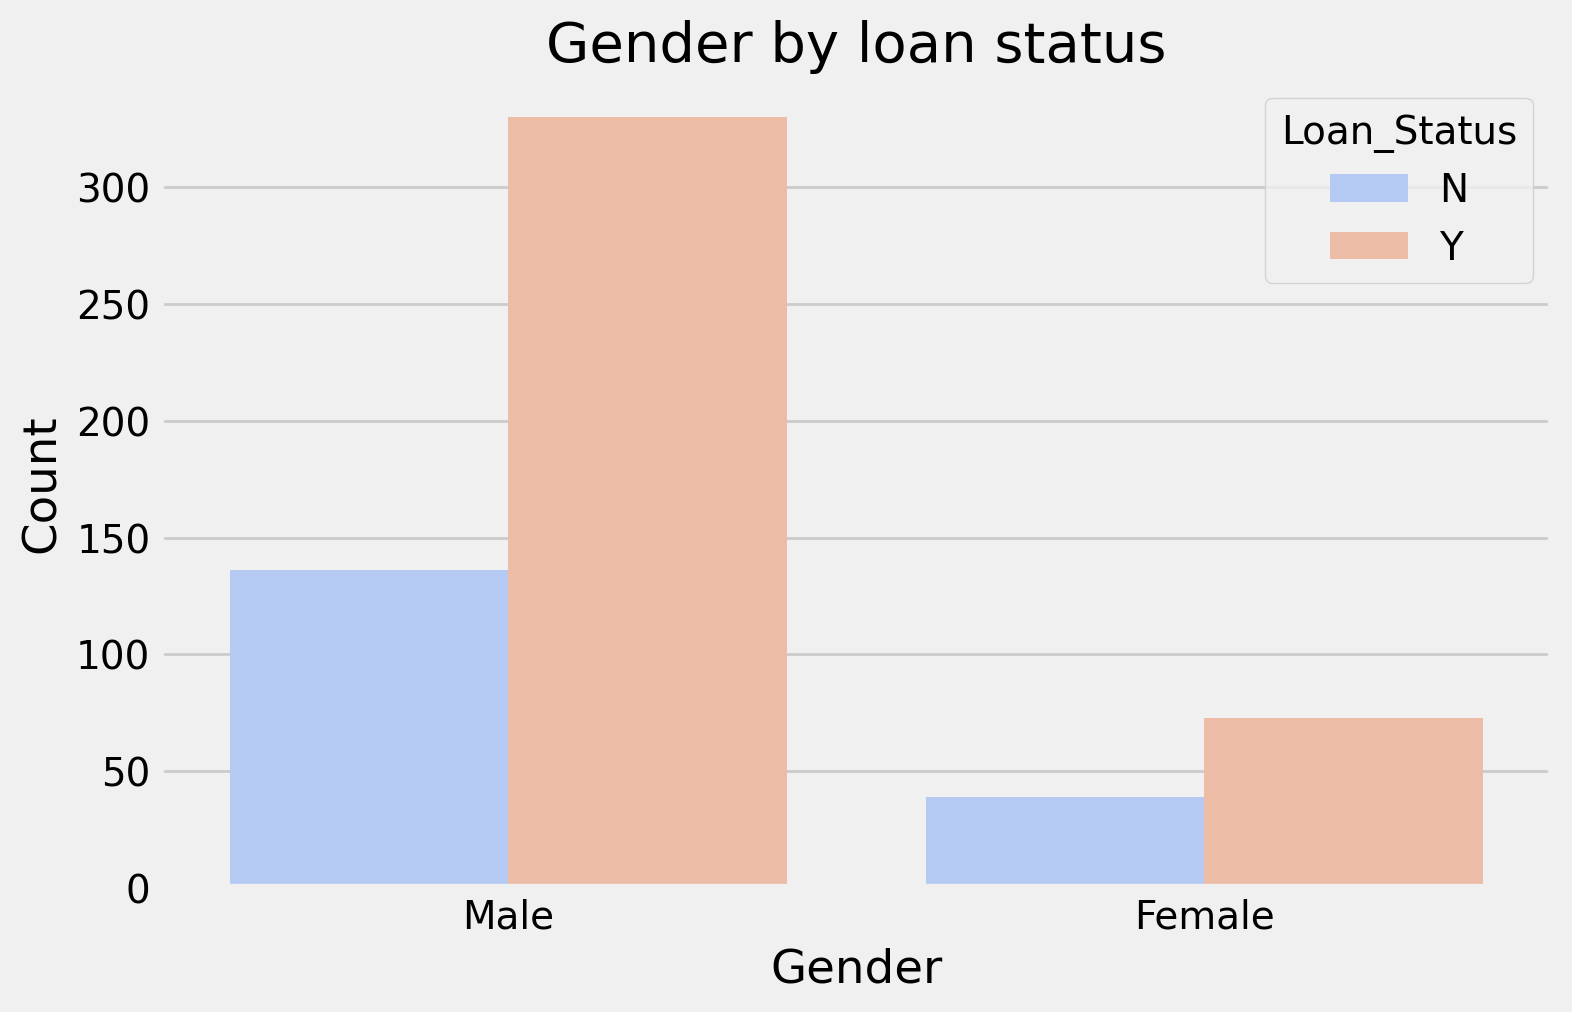

In [62]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Loan_Status', data=df1, palette='coolwarm')
plt.title('Gender by loan status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

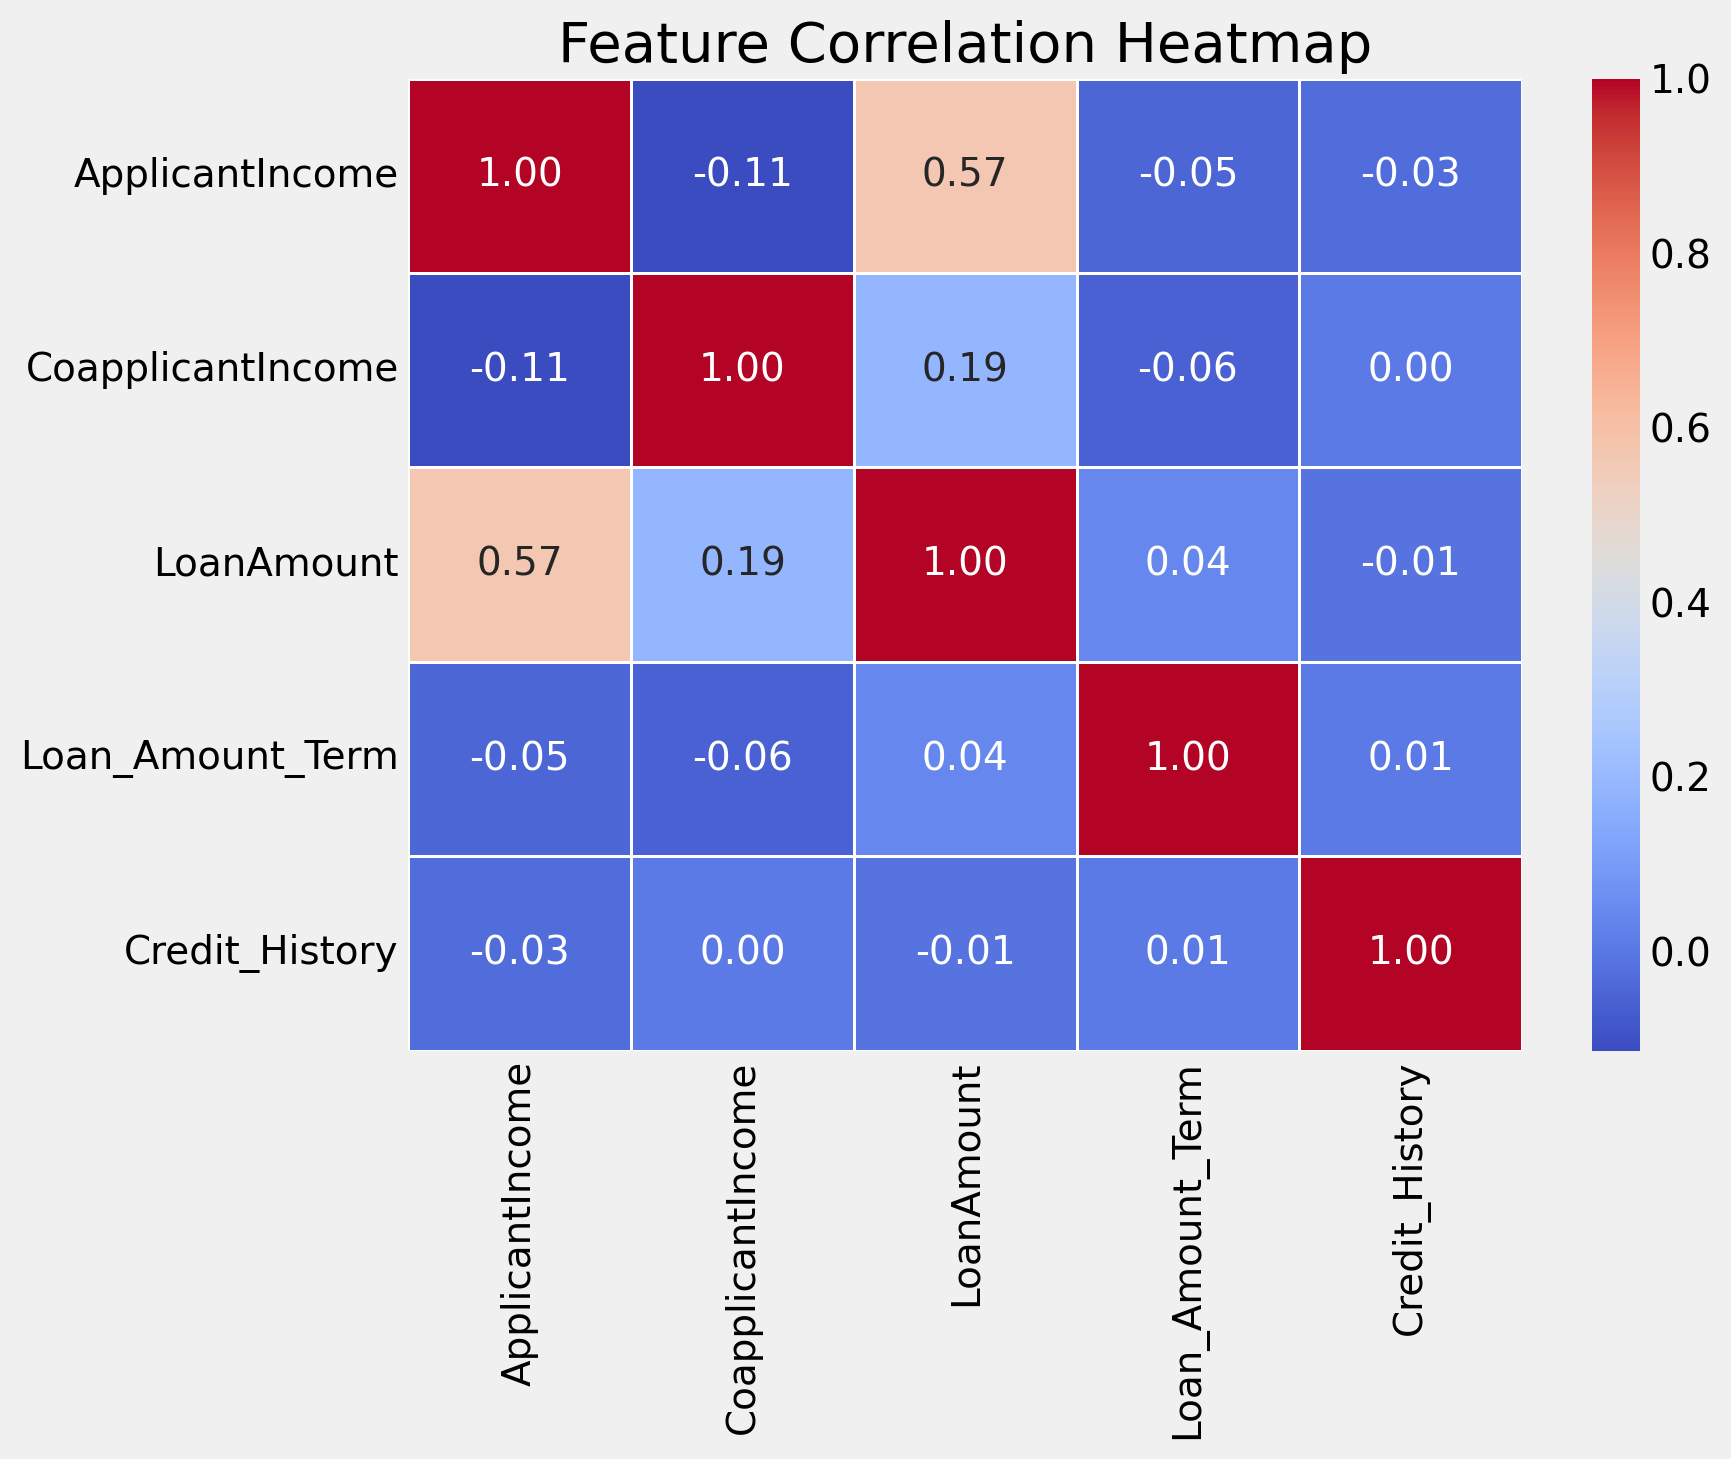

In [64]:
plt.figure(figsize=(8, 6))
sns.heatmap(df1.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()